## Objetivos de aprendizaje
- Comprender la definición formal y la interpretación geométrica/económica de la integral definida.
- Aplicar la Regla de Barrow para calcular integrales definidas con SymPy.
- Resolver problemas tipo: áreas bajo la curva, excedentes (EC y EP), y acumulados a partir de funciones marginales.
- Visualizar resultados con gráficas claras y etiquetas en español.

## Bloque de importación académico estándar

In [1]:
import numpy as np           # para hacer operaciones matemáticas
import pandas as pd          # para manejo de archivos de datos (si aplica)
import sympy as sp           # para álgebra simbólica (integración, derivación)
import matplotlib.pyplot as plt  # para hacer gráficos

## Parte 1: Fundamentos teóricos
### 1.1 Definición de integral definida y Regla de Barrow
Sea $f(x)$ integrable en $[a,b]$ y $F$ una antiderivada de $f$ (es decir, $F' = f$). Entonces:
$$\int_a^b f(x)\,dx = F(b) - F(a)$$
- Interpretación geométrica: área neta bajo la curva de $f$ entre $a$ y $b$.
- Interpretación económica: acumulado neto (p. ej., ingreso/costo adicional) en un intervalo de cantidades.

### 1.2 Propiedades útiles
- Linealidad: $\int_a^b(\alpha f + \beta g)=\alpha\int_a^b f + \beta\int_a^b g$.
- Aditividad por intervalos: $\int_a^c f = \int_a^b f + \int_b^c f$.
- Reversión de límites: $\int_a^b f = -\int_b^a f$.
- Si $f\ge 0$ en $[a,b]$, el valor coincide con el área usual (no negativa).

## Parte 2: Metodología estandarizada (7 pasos)
Sigue esta secuencia para problemas con integrales definidas:

- ✅ Paso 1: Definir variables simbólicas y límites de integración.
- ✅ Paso 2: Definir la función económica (demanda inversa, costo marginal, etc.).
- ✅ Paso 3: Integrar correctamente (indefinida/definida) con `sp.integrate`.
- ✅ Paso 4: Aplicar la Regla de Barrow o sustituir límites directamente.
- ✅ Paso 5: Evaluar y simplificar; si corresponde, obtener valores numéricos.
- ✅ Paso 6: Visualizar (áreas sombreadas) y validar con sumas de Riemann.
- ✅ Paso 7: Interpretar en contexto económico (unidades, precios, bienestar, etc.).

## Ejemplo 1: Área bajo la curva (polinomio)
Problema: Calcular $\\int_0^3 x^2 \\, dx$ y validar con aproximación de Riemann. Interpretar como área.

In [2]:
# Paso 1: variables y función
x = sp.symbols('x')
a, b = 0, 3
f = x**2

In [3]:
# Paso 2: integral definida con SymPy
I = sp.integrate(f, (x, a, b))
I

9

In [4]:
# Paso 3: validación con suma de Riemann (puntos medios)
n = 20
x_edges = np.linspace(a, b, n+1)
x_samples = (x_edges[:-1] + x_edges[1:]) / 2
heights = x_samples**2
dx = (b - a) / n
riemann_mid = np.sum(heights * dx)
float(riemann_mid), float(I)

(8.994375, 9.0)

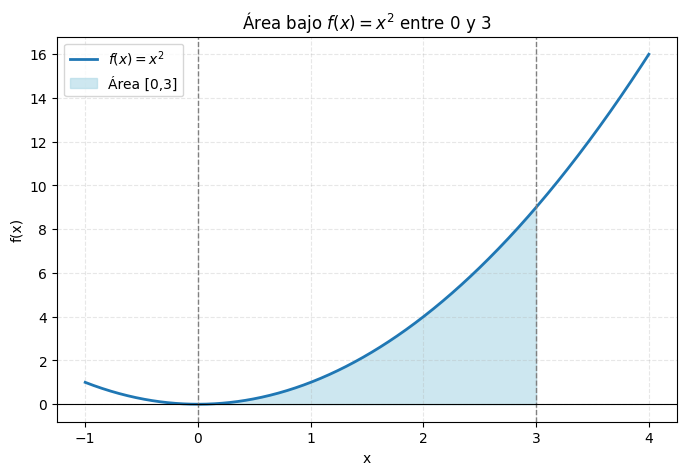

In [5]:
# Paso 4: visualización
x_full = np.linspace(-1, 4, 800)
f_num = sp.lambdify(x, f)(x_full)

x_fill = np.linspace(a, b, 300)
f_fill = sp.lambdify(x, f)(x_fill)

plt.figure(figsize=(8,5))
plt.plot(x_full, f_num, label=r'$f(x)=x^2$', linewidth=2)
plt.fill_between(x_fill, f_fill, 0, color='lightblue', alpha=0.6, label='Área [0,3]')
plt.axvline(a, color='gray', linestyle='--', linewidth=1)
plt.axvline(b, color='gray', linestyle='--', linewidth=1)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Área bajo $f(x)=x^2$ entre 0 y 3')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Interpretación: El valor numérico representa el área total bajo la curva entre 0 y 3. En términos económicos, puede representar el total acumulado de una magnitud marginal positiva.

## Ejemplo 2: Excedente del consumidor y productor (EC y EP)
Demanda: $Q_d(p)=120-3p$; Oferta: $Q_s(p)=-20+2p$.
Trabajaremos con funciones inversas: $p = P_d(q)$ y $p = P_s(q)$ para integrar respecto de $q$.

In [6]:
# Paso 1: variables y funciones inversas
q, p = sp.symbols('q p')
P_d = (120 - q) / 3
P_s = (q + 20) / 2
P_d, P_s

(40 - q/3, q/2 + 10)

In [7]:
# Paso 2: equilibrio competitivo (P_d = P_s)
q_opt = sp.solve(sp.Eq(P_d, P_s), q)[0]
p_opt = P_s.subs(q, q_opt)
q_opt, p_opt

(36, 28)

In [8]:
# Paso 3: Excedentes con integrales definidas
EC = sp.integrate(P_d - p_opt, (q, 0, q_opt))
EP = sp.integrate(p_opt - P_s, (q, 0, q_opt))
EC, EP, sp.simplify(EC+EP)

(216, 324, 540)

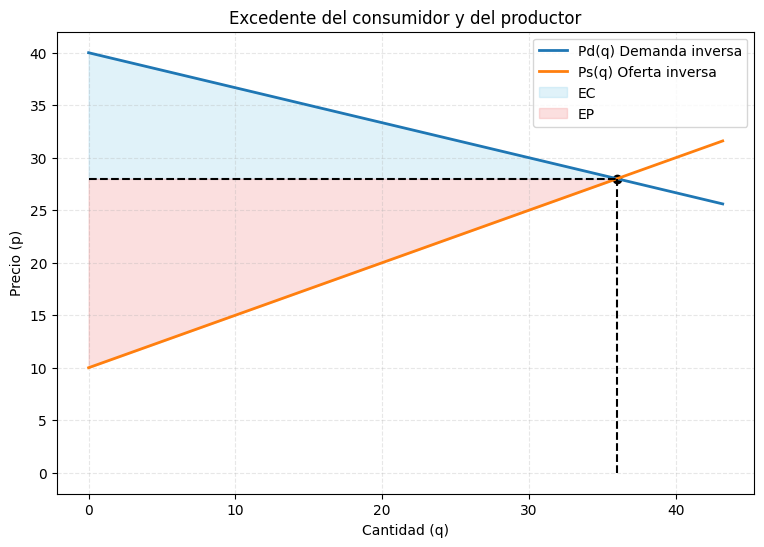

In [9]:
# Paso 4: visualización con áreas
q_grid = np.linspace(0, float(q_opt)*1.2, 500)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)

plt.figure(figsize=(9,6))
plt.plot(q_grid, Pd_num, label='Pd(q) Demanda inversa', linewidth=2)
plt.plot(q_grid, Ps_num, label='Ps(q) Oferta inversa', linewidth=2)
plt.vlines(float(q_opt), 0, float(p_opt), linestyles='--', color='black')
plt.hlines(float(p_opt), 0, float(q_opt), linestyles='--', color='black')
plt.scatter([float(q_opt)], [float(p_opt)], c='black')

mask = (q_grid <= float(q_opt)).tolist()
plt.fill_between(q_grid, Pd_num, float(p_opt), where=mask, alpha=0.25, color='skyblue', label='EC')
plt.fill_between(q_grid, float(p_opt), Ps_num, where=mask, alpha=0.25, color='lightcoral', label='EP')

plt.title('Excedente del consumidor y del productor')
plt.xlabel('Cantidad (q)')
plt.ylabel('Precio (p)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.show()

Extensión (impuesto de suma fija): si un impuesto $t$ desplaza la oferta a $P_s^t(q)=10+t+\tfrac{1}{2}q$, recalcular $q^{*}_t$, $p^{*}_t$, $EC_t$, $EP_t$ y visualizar; la diferencia en bienestar forma la pérdida de peso muerto (DWL).

In [10]:
# Extensión: impuesto de suma fija t=5
t = sp.symbols('t', positive=True)
P_s_t = 10 + t + q/2
P_s_t_5 = P_s_t.subs(t, 5)

q_opt_t = sp.solve(sp.Eq(P_d, P_s_t_5), q)[0]
p_opt_t = P_s_t_5.subs(q, q_opt_t)

EC_t = sp.integrate(P_d - p_opt_t, (q, 0, q_opt_t))
EP_t = sp.integrate(p_opt_t - P_s_t_5, (q, 0, q_opt_t))

float(q_opt), float(p_opt), float(q_opt_t), float(p_opt_t), float(EC), float(EP), float(EC_t), float(EP_t)

(36.0, 28.0, 30.0, 30.0, 216.0, 324.0, 150.0, 225.0)

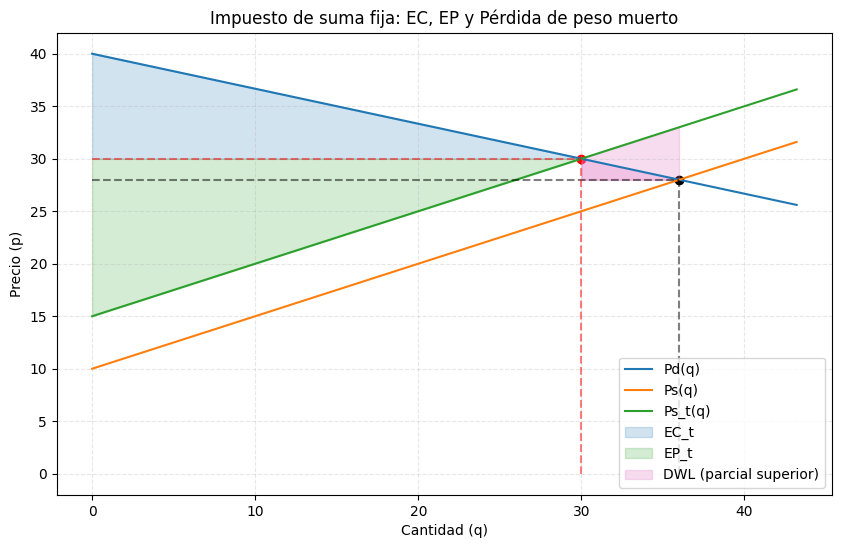

In [11]:
# Visualización comparativa y DWL (áreas)
q_max = float(max(q_opt, q_opt_t))*1.2
q_grid = np.linspace(0, q_max, 600)
Pd_num = sp.lambdify(q, P_d)(q_grid)
Ps_num = sp.lambdify(q, P_s)(q_grid)
Ps_t_num = sp.lambdify(q, P_s_t_5)(q_grid)

plt.figure(figsize=(10,6))
plt.plot(q_grid, Pd_num, label='Pd(q)')
plt.plot(q_grid, Ps_num, label='Ps(q)')
plt.plot(q_grid, Ps_t_num, label='Ps_t(q)')

# Equilibrios
plt.vlines(float(q_opt), 0, float(p_opt), linestyles='--', color='black', alpha=0.5)
plt.hlines(float(p_opt), 0, float(q_opt), linestyles='--', color='black', alpha=0.5)
plt.scatter([float(q_opt)], [float(p_opt)], c='black')

plt.vlines(float(q_opt_t), 0, float(p_opt_t), linestyles='--', color='red', alpha=0.5)
plt.hlines(float(p_opt_t), 0, float(q_opt_t), linestyles='--', color='red', alpha=0.5)
plt.scatter([float(q_opt_t)], [float(p_opt_t)], c='red')

mask_pre = (q_grid <= float(q_opt)).tolist()
mask_post = (q_grid <= float(q_opt_t)).tolist()

# EC y EP post-impuesto
plt.fill_between(q_grid, Pd_num, float(p_opt_t), where=mask_post, alpha=0.2, color='tab:blue', label='EC_t')
plt.fill_between(q_grid, float(p_opt_t), Ps_t_num, where=mask_post, alpha=0.2, color='tab:green', label='EP_t')

# DWL (región entre q_opt_t y q_opt)
mask_dwl = ((q_grid >= float(q_opt_t)) & (q_grid <= float(q_opt))).tolist()
plt.fill_between(q_grid, float(p_opt), Pd_num, where=mask_dwl, alpha=0.25, color='tab:pink', label='DWL (parcial superior)')
plt.fill_between(q_grid, float(p_opt), Ps_t_num, where=mask_dwl, alpha=0.25, color='tab:pink')

plt.title('Impuesto de suma fija: EC, EP y Pérdida de peso muerto')
plt.xlabel('Cantidad (q)')
plt.ylabel('Precio (p)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.show()

## Ejemplo 3: Acumulados a partir de funciones marginales
1) Ingreso marginal $IMg(q)$; el ingreso adicional entre $[a,b]$ es $\int_a^b IMg(q)\,dq$.
2) Costo marginal $CMg(q)$; el costo variable adicional entre $[a,b]$ es $\int_a^b CMg(q)\,dq$.

In [12]:
# 3.1 Ingreso marginal lineal desde una demanda inversa
q = sp.symbols('q', nonnegative=True)
alpha, beta = 80, 1.5
P = alpha - beta*q
I = P*q
IMg = sp.diff(I, q)

# Acumulado entre 10 y 20
I_acum = sp.integrate(IMg, (q, 10, 20))
IMg, sp.simplify(I), I_acum

(80 - 3.0*q, q*(80.0 - 1.5*q), 350.000000000000)

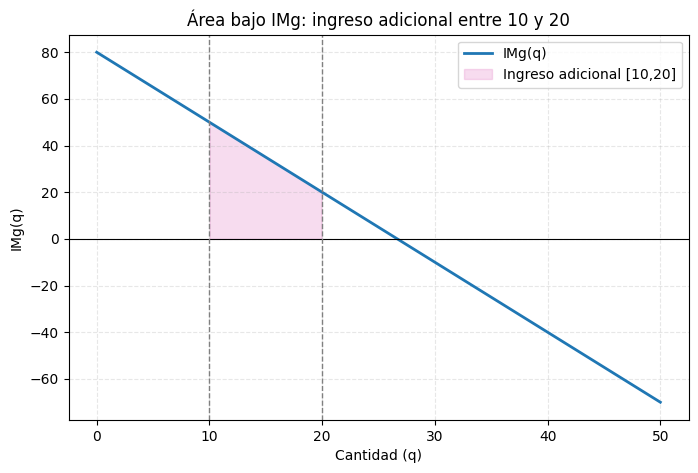

In [13]:
# Visualización IMg y área acumulada
q_grid = np.linspace(0, 50, 500)
IMg_num = sp.lambdify(q, IMg)(q_grid)

plt.figure(figsize=(8,5))
plt.plot(q_grid, IMg_num, label='IMg(q)', linewidth=2)
mask = ((q_grid >= 10) & (q_grid <= 20)).tolist()
plt.fill_between(q_grid, IMg_num, 0, where=mask, alpha=0.25, color='tab:pink', label='Ingreso adicional [10,20]')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(10, color='gray', linestyle='--', linewidth=1)
plt.axvline(20, color='gray', linestyle='--', linewidth=1)
plt.title('Área bajo IMg: ingreso adicional entre 10 y 20')
plt.xlabel('Cantidad (q)')
plt.ylabel('IMg(q)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.show()

In [14]:
# 3.2 Costo marginal y costo variable acumulado
CMg = q**2/3 + 2*q
C = sp.integrate(CMg, q) + sp.symbols('F')  # función total (con constante genérica)
# Costo variable adicional entre 10 y 20
CV_acum = sp.integrate(CMg, (q, 10, 20))
CMg, CV_acum

(q**2/3 + 2*q, 9700/9)

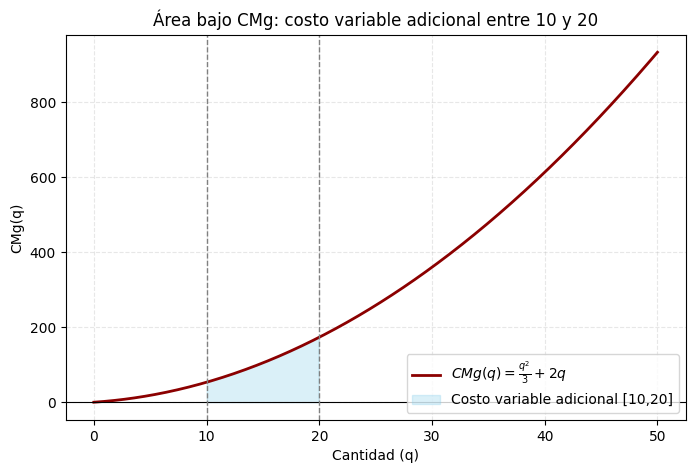

In [15]:
# Visualización CMg y área acumulada [10,20]
q_grid = np.linspace(0, 50, 500)
CMg_num = sp.lambdify(q, CMg)(q_grid)

plt.figure(figsize=(8,5))
plt.plot(q_grid, CMg_num, label='$CMg(q) = \\frac{q^2}{3} + 2q$', linewidth=2, color='darkred')
mask = ((q_grid >= 10) & (q_grid <= 20)).tolist()
plt.fill_between(q_grid, CMg_num, 0, where=mask, alpha=0.3, color='skyblue', label='Costo variable adicional [10,20]')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(10, color='gray', linestyle='--', linewidth=1)
plt.axvline(20, color='gray', linestyle='--', linewidth=1)
plt.title('Área bajo CMg: costo variable adicional entre 10 y 20')
plt.xlabel('Cantidad (q)')
plt.ylabel('CMg(q)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.show()

## Checklist de resolución (para tu carpeta de estudio)
- Identifica la variable de integración correcta (¿q o p?).
- Si mides excedentes, usa funciones inversas y límites adecuados.
- Usa `sp.integrate(f, (x, a, b))` para definida; valida con Barrow.
- Visualiza y sombrear correctamente el intervalo de integración.
- Interpreta la unidad económica del resultado (precio, cantidad, $). 